#### Data Science Project - Machine Leaning.

Capstone: 
Y = (Predicted) Diabetes 
X = (Multiple Factors) 


ML Algorithms = Will be focusing on supervised (multiple linear regression) numeric values.

####### Data provided by https://data.cdc.gov/
Dataset Files:  Diabetes.cvs
Data Measure: 500 Cities: Diagnosed diabetes among adults aged >=18 years








In [18]:

# importing the libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 
# %metplotlib inline #


In [19]:
# Reading, loading  datasets. 

df_Diabetes = pd.read_csv("NewDataDiabetes.csv")
df_Diabetes.drop(df_Diabetes.filter(regex="Unnamed"), axis=1, inplace=True)

In [20]:
df_Diabetes

,States,City,Age-adj_preval,PopCountByMM
0,TX,Abilene,Age-adjusted prevalence,"117,063"
1,OH,Akron,Age-adjusted prevalence,"199,110"
2,CA,Alameda,Age-adjusted prevalence,"73,812"
3,GA,Albany,Age-adjusted prevalence,"77,434"
4,NY,Albany,Age-adjusted prevalence,"97,856"
...,...,...,...,...
496,WA,Yakima,Age-adjusted prevalence,"91,067"
497,NY,Yonkers,Age-adjusted prevalence,"195,976"
498,OH,Youngstown,Age-adjusted prevalence,"66,982"
499,AZ,Yuma,Age-adjusted prevalence,"93,064"


In [21]:
df_Diabetes.count()

States            501
City              500
Age-adj_preval    501
PopCountByMM      501
dtype: int64

In [22]:
df_Diabetes.shape

(501, 4)

In [23]:
df_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   States          501 non-null    object
 1   City            500 non-null    object
 2   Age-adj_preval  501 non-null    object
 3   PopCountByMM    501 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [25]:
# Removing the comma and change the data type from object to int. 
df_Diabetes["PopCountByMM"] = df_Diabetes["PopCountByMM"].str.replace(',','').astype(int)

Run statistic on the dataset

In [ ]:
df_Diabetes.describe().T

C:\Users\dolly\AppData\Local\Temp\ipykernel_1800\497784529.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Diabetes.corr(), square=True, annot=True )


<Axes: >

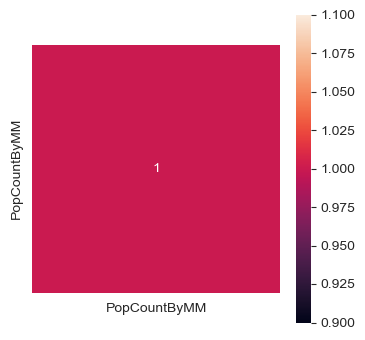

In [26]:
# View the summary by heatmap

sns.set_style('white')
plt.figure(figsize=(4,4))
x = df_Diabetes.iloc[:, :0].values
y = df_Diabetes.iloc[:, 1:7].values
sns.heatmap(df_Diabetes.corr(), square=True, annot=True )

C:\Users\dolly\AppData\Local\Temp\ipykernel_11436\2678215914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_CA_Diabetes.corr()[['EstPopByCountyCity']].sort_values('EstPopByCountyCity', ascending=False),


<Axes: >

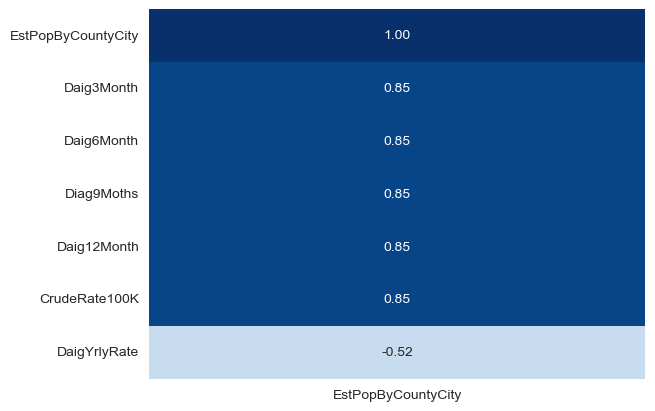

In [ ]:
sns.heatmap(data=df_CA_Diabetes.corr()[['EstPopByCountyCity']].sort_values('EstPopByCountyCity', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [ ]:
df_CA_Diabetes.columns

Index(['City_Name', 'EstPopByCountyCity', 'Daig3Month', 'Daig6Month',
       'Diag9Moths', 'Daig12Month', 'DaigYrlyRate', 'CrudeRate100K'],
      dtype='object')

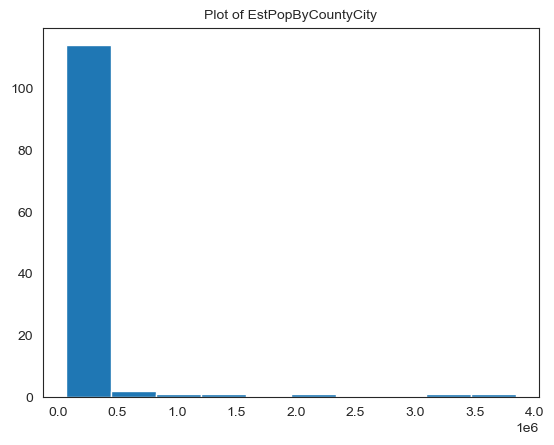

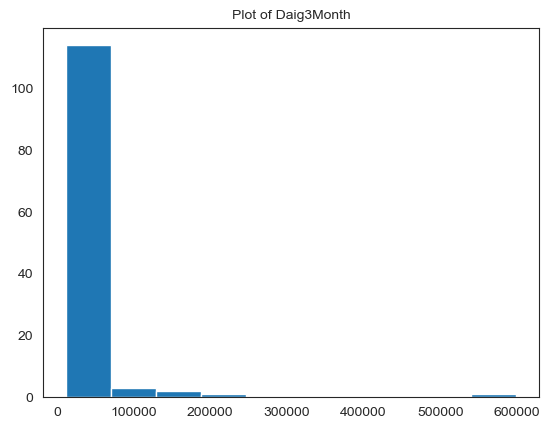

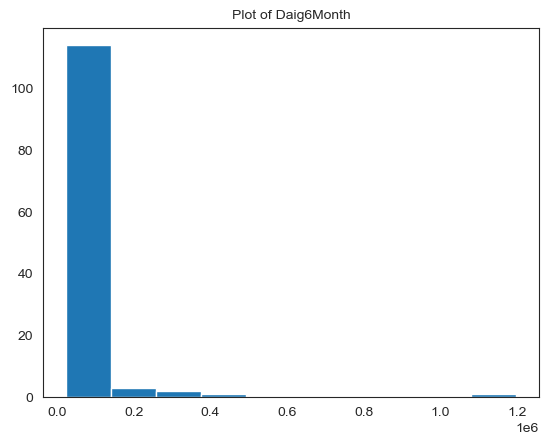

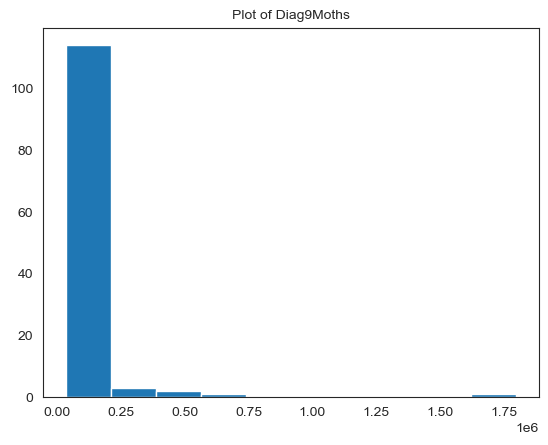

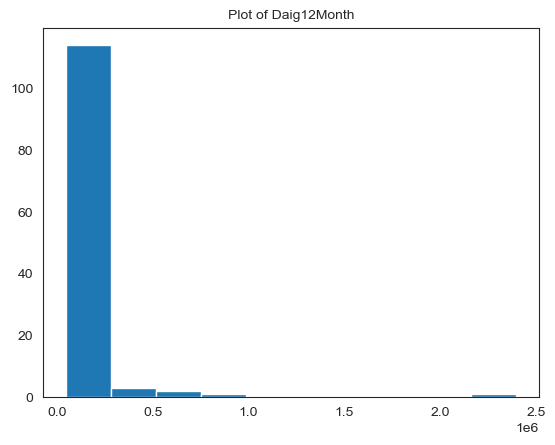

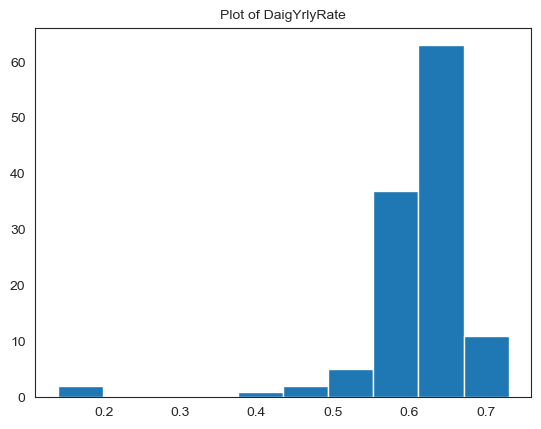

In [ ]:
for c in (df_CA_Diabetes.columns[1:7]):
    plt.title("Plot of "+c,fontsize=10)
    plt.hist(df_CA_Diabetes[c],bins=10)
    plt.show()

In [ ]:
df_CA_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_Name           121 non-null    object 
 1   EstPopByCountyCity  121 non-null    int64  
 2   Daig3Month          121 non-null    float64
 3   Daig6Month          121 non-null    float64
 4   Diag9Moths          121 non-null    float64
 5   Daig12Month         121 non-null    int64  
 6   DaigYrlyRate        121 non-null    float64
 7   CrudeRate100K       121 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.7+ KB


In [ ]:

df_CA_Diabetes.sort_values(["EstPopByCountyCity"])
#df_CA_Diabetes.sort_values(["City_Name","EstPopByCountyCity"], ascending=[1,0])
#df_CA_Diabetes

,City_Name,EstPopByCountyCity,Daig3Month,Daig6Month,Diag9Moths,Daig12Month,DaigYrlyRate,CrudeRate100K
8,CA Lynwood,65505,11628.75,23257.5,34886.25,46515,0.71,2.3
0,CA Redondo Beach,69781,11124.75,22249.5,33374.25,44499,0.64,2.2
7,CA Union City,70460,11586.00,23172.0,34758.00,46344,0.66,2.3
16,CA Baldwin Park,70629,12565.00,25130.0,37695.00,50260,0.71,2.5
4,CA Turlock,72682,11424.75,22849.5,34274.25,45699,0.63,2.3
...,...,...,...,...,...,...,...,...
118,CA San Jose,983489,155460.50,310921.0,466381.50,621842,0.63,31.1
119,CA San Diego,1381611,214759.25,429518.5,644277.75,859037,0.62,43.0
115,CA Sacramento,2215000,77315.00,154630.0,231945.00,309260,0.14,15.5
117,CA San Francisco,3313000,132663.75,265327.5,397991.25,530655,0.16,26.5


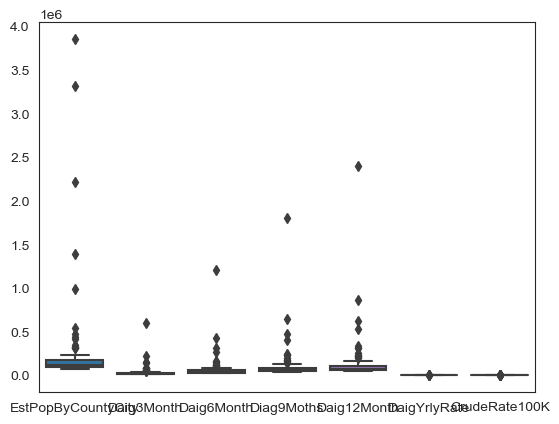

In [ ]:
# When comparing values the data type must be the same.
#Xample:                            
#ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'floors',y = 'price')

#ax = sns.boxplot(data=df_CA_Diabetes.query('Daig3Month >= 11628.75  and  EstPopByCountyCity >= 69781'), x = 'EstPopByCountyCity', y = 'Daig3Month' )
ax = sns.boxplot(data=df_CA_Diabetes.query('Daig12Month >= 46515  and Diag9Moths >= 34886.25 '))


Create linear regression modles to predict the values/or death rate. 